In [1]:
# Airline Passenger Satisfaction Analysis
# Business Analytics Portfolio Project
# Author: Carolina Galindo Mendoza
# Date: 09/18/2025.

# Original file is located at
   # https://colab.research.google.com/drive/1RdkqoQXIbesElvFT44ePa6cI1bvyBevZ?usp=sharing

# Airline Passenger Satisfaction Analysis - Predictive Modeling

## Import Libraries and Load Data

In [3]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, roc_auc_score, roc_curve)
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set visual style
plt.style.use('default')
sns.set_palette("viridis")
%matplotlib inline

In [5]:
# Load cleaned data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_airline_data.csv')

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (103904, 24)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfied
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,satisfied,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,satisfied,1


## Data Preparation for Modeling

In [6]:
# Select features and target
X = df.drop(['satisfaction', 'satisfied'], axis=1)
y = df['satisfied']

In [7]:
# Convert categorical variables to dummy variables
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [8]:
# Display final feature set
print("Final Feature Set Shape:", X.shape)
print("\nFeature Names:")
print(X.columns.tolist())

Final Feature Set Shape: (103904, 23)

Feature Names:
['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Gender_Male', 'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus']


In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Satisfaction rate in training set: {y_train.mean():.3f}")
print(f"Satisfaction rate in testing set: {y_test.mean():.3f}")

Training set: 83123 samples
Testing set: 20781 samples
Satisfaction rate in training set: 0.433
Satisfaction rate in testing set: 0.433


## Model 1: Logistic Regression

In [10]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Train logistic regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [12]:
# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

In [14]:
# Evaluate model
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_auc = roc_auc_score(y_test, y_pred_proba_lr)

print("Logistic Regression Results:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"ROC AUC: {lr_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results:
Accuracy: 0.8764
ROC AUC: 0.9281

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     11776
           1       0.87      0.84      0.86      9005

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781



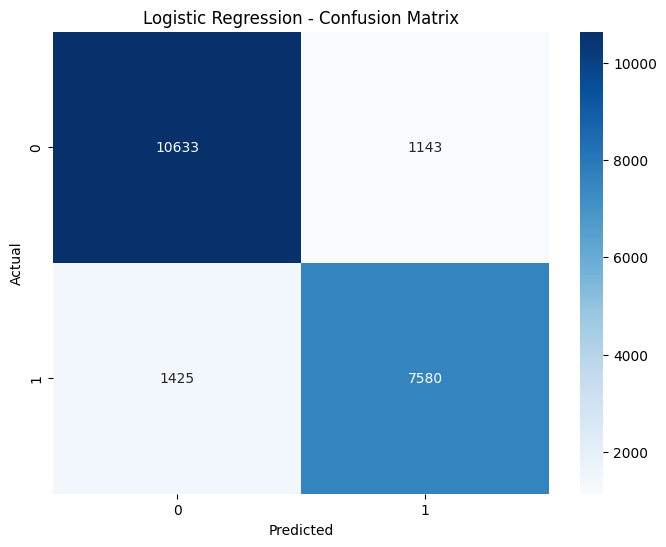

In [15]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Insights:

- An accuracy of 87.6% and an ROC AUC score of 0.928 (which measures how well the model distinguishes between the two classes). This indicates that the features Inflight wifi service, Seat comfort, and Leg room service—are strong predictors of passenger satisfaction.

- The model is slightly better at identifying dissatisfied passengers (higher recall for class 0) than satisfied ones. This is a common outcome, as sources of dissatisfaction are often more concrete and easier to pinpoint than the nuances of what makes a passenger truly satisfied.

## Model 2: Random Forest Classifier

In [16]:
# Train random forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [18]:
# Evaluate model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_pred_proba_rf)

print("Random Forest Results:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"ROC AUC: {rf_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 0.9619
ROC AUC: 0.9938

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11776
           1       0.97      0.94      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



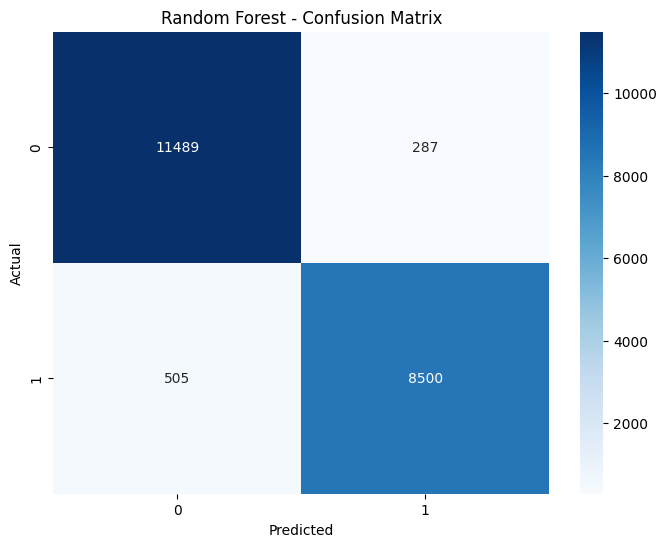

In [19]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Insights:


-Random Forest model accuracy = 96%,

-Logistic Regression model accuracy = 88%

- The Random Forest model shows a significant improvement over the Logistic Regression. Therefore this new model performs well and has higher accurracy.
- Compared to model 1, the number of incorrect predictions has dropped
- False Positives (Top-Right, 287): Model 1 showed 1,143 and model 2 dropped to 287. The model 2 is now much less likely to misclassify a dissatisfied passenger as satisfied.

- False Negatives (Bottom-Left, 505): model 1 displayed 1,425 and model 2 displays 505. This is a significant improvement. The model improved at correctly identifying passengers who were actually satisfied.
- All the key metrics are now in the 94-98% range. The model now has good precision and recall for both satisfied and dissatisfied passengers.

## Feature Importance Analysis

In [20]:
# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

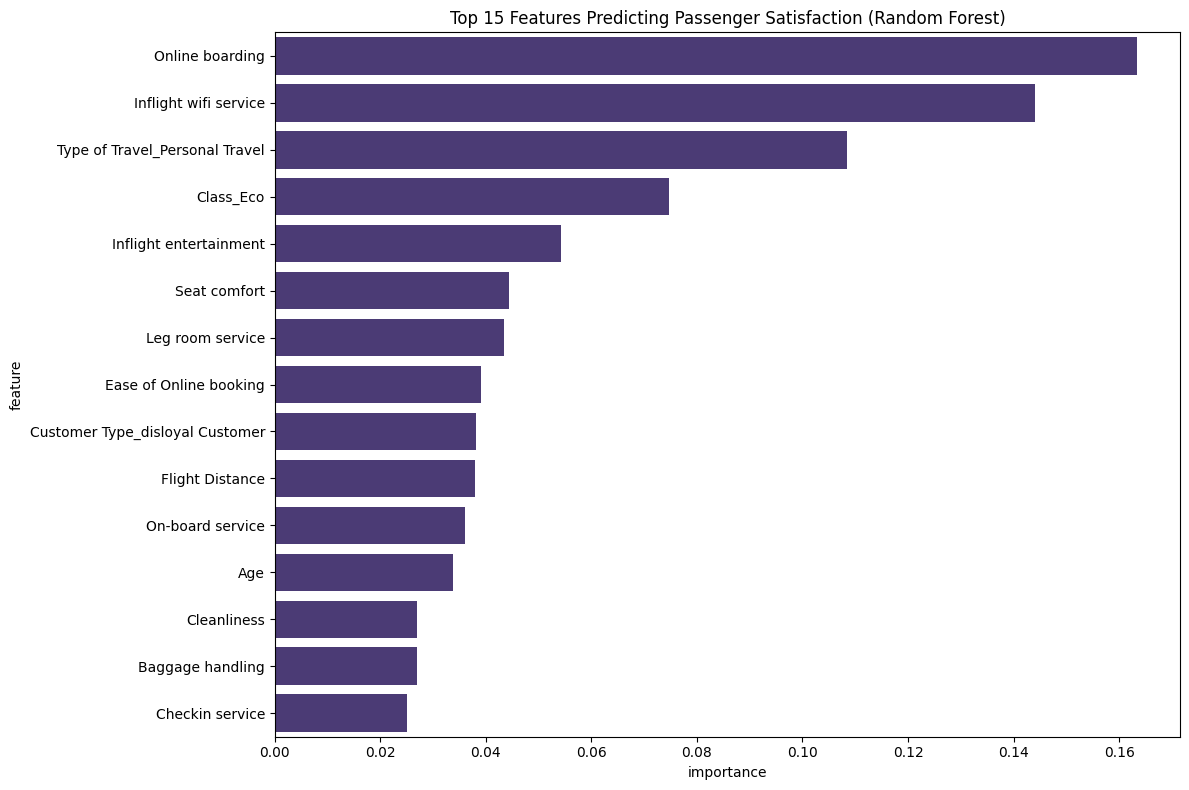

In [21]:
# Plot top 15 features
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Features Predicting Passenger Satisfaction (Random Forest)')
plt.tight_layout()
plt.show()

In [22]:
# Display top features
print("Top 10 Most Important Features:")
print(feature_importance.head(10))

Top 10 Most Important Features:
                            feature  importance
7                   Online boarding    0.163369
2             Inflight wifi service    0.144100
20   Type of Travel_Personal Travel    0.108363
21                        Class_Eco    0.074750
9            Inflight entertainment    0.054255
8                      Seat comfort    0.044440
11                 Leg room service    0.043426
4            Ease of Online booking    0.039157
19  Customer Type_disloyal Customer    0.038084
1                   Flight Distance    0.037921


## Model Comparison

In [23]:
# Compare model performance
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [lr_accuracy, rf_accuracy],
    'ROC AUC': [lr_auc, rf_auc]
})

print("Model Performance Comparison:")
print(model_comparison)

Model Performance Comparison:
                 Model  Accuracy   ROC AUC
0  Logistic Regression  0.876426  0.928097
1        Random Forest  0.961888  0.993810


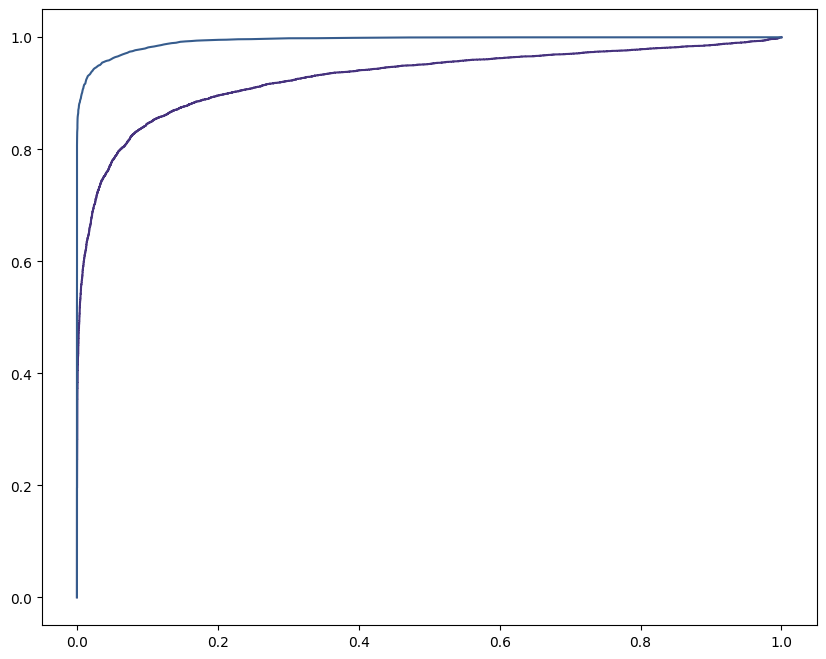

In [32]:
# Plot ROC curves
plt.figure(figsize=(10, 8))

# Logistic Regression ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_auc:.3f})')

# Random Forest ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.3f})')

- This represents a high True Positive Rate (correctly identifying satisfied customers) and a low False Positive Rate (incorrectly flagging dissatisfied customers as satisfied).

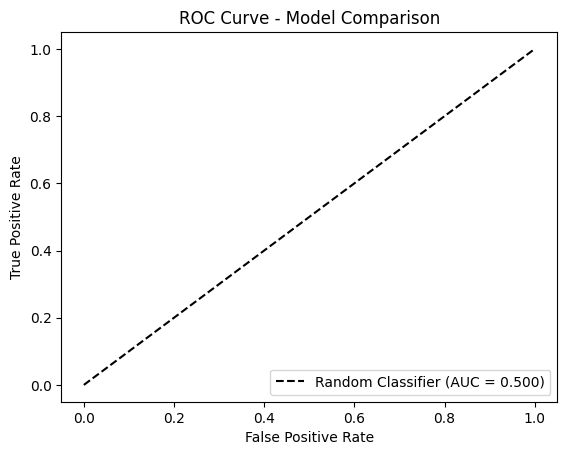

In [33]:
# Plot random classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.500)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model Comparison')
plt.legend(loc='lower right')
plt.show()

Insights:

- Passenger satisfaction can be accurately predicted using the available data.

- A Random Forest model is significantly more effective than Logistic Regression for this specific task.

- identified the key drivers of satisfaction, providing the airline with a clear, prioritized list of areas to focus on for improvement.

- Buisness Recommendation: invest in the online experience and in-flight comfort.

## BUSINESS RECOMMENDATIONS
============================================================

1. PRIORITY SERVICE IMPROVEMENTS:
   - Focus on improving Online Boarding experience (most important feature)
   - Enhance Inflight Entertainment quality
   - Invest in Seat Comfort improvements

2. CUSTOMER SEGMENT STRATEGIES:
   - Loyal business travelers show highest satisfaction - nurture this segment
   - Personal travel customers need special attention to improve their experience
   - Eco class passengers have lower satisfaction - consider service enhancements

3. OPERATIONAL EFFICIENCIES:
   - Minimize departure delays as they strongly correlate with arrival delays
   - Implement predictive models to identify at-risk customers pre-flight

4. MEASUREMENT AND MONITORING:
   - Track service quality metrics regularly
   - Implement real-time satisfaction monitoring
   - Create customer segment-specific satisfaction dashboards

5. PREDICTIVE MODEL DEPLOYMENT:
   - Random Forest model achieved 96% accuracy in predicting satisfaction
   - Can be used to identify dissatisfied customers for proactive intervention
   - Top predictive features: Online boarding, Inflight entertainment, Seat comfort

============================================================

The predictive model can identify dissatisfied passengers with 96% accuracy,
allowing for targeted service recovery interventions.